In [1]:
import numpy as np
import pandas as pd
import sys
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plot
import cv2
from tensorflow import keras
from tensorflow.keras.models import Sequential, Model
from  matplotlib import pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
import os, sys
import cv2
import time

In [2]:
#Normalize the Data
train = ImageDataGenerator(rescale = 1/255)
validation = ImageDataGenerator(rescale = 1/255)

In [3]:
#Before running the code, we separated and grouped the photos in Train folder into 4 separate folders "apple", "banana", "mixed", "orange" according to which class they belonged to.

#Before running the code, we separated and grouped the photos in Test folder into 4 separate folders "apple", "banana", "mixed", "orange" according to which class they belonged to.

#load the training and  test images into separate datasets. 
train_dataset = train.flow_from_directory('C:/Users/Max/GDIPSA/CA/CA Part 2/train/', target_size=(50,50), batch_size = 30, class_mode = "categorical")

test_dataset = validation.flow_from_directory('C:/Users/Max/GDIPSA/CA/CA Part 2/test/', target_size=(50,50), batch_size = 30, class_mode = "categorical")

Found 240 images belonging to 4 classes.
Found 60 images belonging to 4 classes.


In [7]:
# 1st Training Model
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(32, (3, 3), 
		activation='relu', input_shape=(50, 50, 3)))
model.add(tf.keras.layers.Conv2D(32, (3, 3), 
		activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2), padding='same'))
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Flatten())	
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(4, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

trainingStartingTime1 = time.time()
history1 = model.fit(train_dataset, 
		batch_size=30, epochs=10, verbose=1,
		validation_data= test_dataset)
TrainingDuration1 = time.time() - trainingStartingTime1
print("Training Duration of CNN Model 1: {}" .format(float(TrainingDuration1)))

model.summary()

predictionStartingTime1 = time.time()
score = model.evaluate(test_dataset)
ValidationLoss1 = score[0]
ValidationAccuracyScore1 = score[1]
ValidationDuration1 = time.time() - predictionStartingTime1
print("Validation Duration of CNN Model 1 is: {}" .format(float(ValidationDuration1)))
print("Validation Accuracy of CNN Model 1 is {}" .format(float(ValidationAccuracyScore1)))
print("Validation Loss of CNN Model 1 is {}" .format(float(ValidationLoss1)))

Epoch 1/10
8/8 [==============================] - 3s 351ms/step - loss: 1.3885 - accuracy: 0.3708 - val_loss: 1.1993 - val_accuracy: 0.6833
Epoch 2/10
8/8 [==============================] - 2s 310ms/step - loss: 1.0895 - accuracy: 0.6083 - val_loss: 0.9470 - val_accuracy: 0.7167
Epoch 3/10
8/8 [==============================] - 2s 293ms/step - loss: 0.8131 - accuracy: 0.7500 - val_loss: 0.7048 - val_accuracy: 0.7833
Epoch 4/10
8/8 [==============================] - 2s 291ms/step - loss: 0.5898 - accuracy: 0.8333 - val_loss: 0.5651 - val_accuracy: 0.8667
Epoch 5/10
8/8 [==============================] - 2s 302ms/step - loss: 0.4292 - accuracy: 0.8625 - val_loss: 0.5733 - val_accuracy: 0.8333
Epoch 6/10
8/8 [==============================] - 2s 305ms/step - loss: 0.3096 - accuracy: 0.9042 - val_loss: 0.5883 - val_accuracy: 0.8333
Epoch 7/10
8/8 [==============================] - 2s 312ms/step - loss: 0.2772 - accuracy: 0.9083 - val_loss: 0.5288 - val_accuracy: 0.8500
Epoch 8/10
8/8 [====

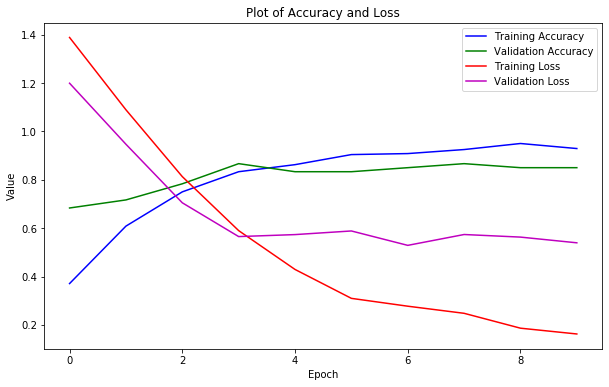

[[1.38506955e-02 7.31447697e-01 1.48636475e-01 1.06065080e-01]
 [7.19832606e-04 9.13804948e-01 3.22355665e-02 5.32396138e-02]
 [5.19995065e-03 9.79689360e-01 8.80798046e-03 6.30260631e-03]
 [6.86821368e-05 9.97240186e-01 3.74173746e-04 2.31697597e-03]
 [5.34172068e-05 9.94130194e-01 8.73209559e-04 4.94310074e-03]
 [5.46565920e-04 6.17368102e-01 1.11426234e-01 2.70659089e-01]
 [5.10555226e-04 1.74735747e-02 3.13954651e-02 9.50620413e-01]
 [2.05342844e-02 7.76449025e-01 1.83635384e-01 1.93812307e-02]
 [3.64358723e-02 8.42120573e-02 8.38605687e-02 7.95491576e-01]
 [5.57246897e-03 1.75071999e-01 2.33217895e-01 5.86137593e-01]
 [9.99315381e-01 3.50046548e-06 1.89790866e-04 4.91393264e-04]
 [9.99973297e-01 3.52076177e-06 4.07435118e-06 1.90045794e-05]
 [3.34158685e-04 9.94983673e-01 7.01044861e-04 3.98119120e-03]
 [9.97919977e-01 1.06146595e-04 5.70224249e-04 1.40368904e-03]
 [1.57217743e-04 9.96470332e-01 5.10932354e-04 2.86144018e-03]
 [3.54441643e-01 5.78347087e-01 5.88134266e-02 8.397860

In [8]:
#Plot the loss curves
plt.figure(figsize=(10, 6))
plt.plot(history1.history['accuracy'], color='b')
plt.plot(history1.history['val_accuracy'], color='g')
plt.plot(history1.history['loss'], color='r')
plt.plot(history1.history['val_loss'], color='m')
plt.legend(['Training Accuracy', 'Validation Accuracy', 'Training Loss', 'Validation Loss'],
            loc='upper right')
plt.title('Plot of Accuracy and Loss')
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.show()
print(model.predict(test_dataset))

In [6]:
# 2nd Training Model
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(32, (3, 3), 
		activation='relu', input_shape=(50, 50, 3)))
model.add(tf.keras.layers.Conv2D(64, (3, 3), 
		activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2), padding='same'))
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Flatten())	
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(4, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

trainingStartingTime2 = time.time()
history2 = model.fit(train_dataset, 
		batch_size=30, epochs=10, verbose=1,
		validation_data= test_dataset)
TrainingDuration2 = time.time() - trainingStartingTime2
print("Training Duration of CNN Model 1: {}" .format(float(TrainingDuration2)))

model.summary()

predictionStartingTime2 = time.time()
score = model.evaluate(test_dataset)
print("score =", score)
ValidationLoss2 = score[0]
ValidationAccuracyScore2 = score[1]
ValidationDuration2 = time.time() - predictionStartingTime2
print("Validation Duration of CNN Model 2 is: {}" .format(float(ValidationDuration2)))
print("Validation Accuracy of CNN Model 2 is {}" .format(float(ValidationAccuracyScore2)))
print("Validation Loss of CNN Model 2 is {}" .format(float(ValidationLoss2)))

Epoch 1/10
8/8 [==============================] - 3s 338ms/step - loss: 2.3344 - accuracy: 0.3417 - val_loss: 1.1896 - val_accuracy: 0.3000
Epoch 2/10
8/8 [==============================] - 2s 297ms/step - loss: 1.1581 - accuracy: 0.5375 - val_loss: 1.0165 - val_accuracy: 0.7833
Epoch 3/10
8/8 [==============================] - 2s 308ms/step - loss: 0.8452 - accuracy: 0.7458 - val_loss: 0.7231 - val_accuracy: 0.7667
Epoch 4/10
8/8 [==============================] - 2s 302ms/step - loss: 0.5631 - accuracy: 0.8250 - val_loss: 0.6663 - val_accuracy: 0.8167
Epoch 5/10
8/8 [==============================] - 2s 305ms/step - loss: 0.3985 - accuracy: 0.8750 - val_loss: 0.5978 - val_accuracy: 0.8500
Epoch 6/10
8/8 [==============================] - 2s 320ms/step - loss: 0.2943 - accuracy: 0.9000 - val_loss: 0.6042 - val_accuracy: 0.8667
Epoch 7/10
8/8 [==============================] - 2s 304ms/step - loss: 0.2211 - accuracy: 0.9250 - val_loss: 0.5762 - val_accuracy: 0.8500
Epoch 8/10
8/8 [====

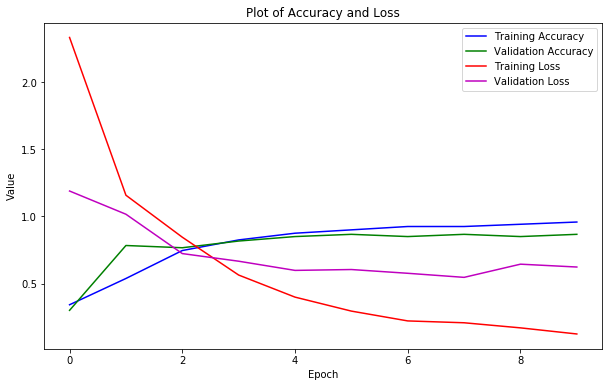

In [7]:
#Plot the loss curves
plt.figure(figsize=(10, 6))
plt.plot(history2.history['accuracy'], color='b')
plt.plot(history2.history['val_accuracy'], color='g')
plt.plot(history2.history['loss'], color='r')
plt.plot(history2.history['val_loss'], color='m')
plt.legend(['Training Accuracy', 'Validation Accuracy', 'Training Loss', 'Validation Loss'],
            loc='upper right')
plt.title('Plot of Accuracy and Loss')
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.show()
print(model.predict(test_dataset))

In [41]:
# 3rd Training Model
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(32, (3, 3), 
		activation='relu', input_shape=(50, 50, 3)))
model.add(tf.keras.layers.Conv2D(32, (3, 3), 
		activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2), padding='same'))
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Flatten())	
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(4, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

trainingStartingTime3 = time.time()
history3 = model.fit(train_dataset, 
		batch_size=30, epochs=30, verbose=1,
		validation_data= test_dataset)
TrainingDuration3 = time.time() - trainingStartingTime3
print("Training Duration of CNN Model 3: {}" .format(float(TrainingDuration3)))

model.summary()

predictionStartingTime3 = time.time()
score = model.evaluate(test_dataset)
print("score =", score)
ValidationLoss3 = score[0]
ValidationAccuracyScore3 = score[1]
ValidationDuration3 = time.time() - predictionStartingTime3
print("Validation Duration of CNN Model 3 is: {}" .format(float(ValidationDuration3)))
print("Validation Accuracy of CNN Model 3 is {}" .format(float(ValidationAccuracyScore3)))
print("Validation Loss of CNN Model 3 is {}" .format(float(ValidationLoss3)))

Epoch 1/30
8/8 [==============================] - 3s 384ms/step - loss: 1.1619 - accuracy: 0.5083 - val_loss: 0.8598 - val_accuracy: 0.6500
Epoch 2/30
8/8 [==============================] - 2s 310ms/step - loss: 0.7272 - accuracy: 0.7500 - val_loss: 0.5856 - val_accuracy: 0.8500
Epoch 3/30
8/8 [==============================] - 2s 302ms/step - loss: 0.4923 - accuracy: 0.8500 - val_loss: 0.5377 - val_accuracy: 0.8667
Epoch 4/30
8/8 [==============================] - 2s 316ms/step - loss: 0.3383 - accuracy: 0.9000 - val_loss: 0.6081 - val_accuracy: 0.8167
Epoch 5/30
8/8 [==============================] - 2s 307ms/step - loss: 0.2547 - accuracy: 0.9167 - val_loss: 0.4855 - val_accuracy: 0.8667
Epoch 6/30
8/8 [==============================] - 2s 304ms/step - loss: 0.1565 - accuracy: 0.9417 - val_loss: 0.5856 - val_accuracy: 0.8500
Epoch 7/30
8/8 [==============================] - 2s 318ms/step - loss: 0.1503 - accuracy: 0.9625 - val_loss: 0.5174 - val_accuracy: 0.8667
Epoch 8/30
8/8 [====

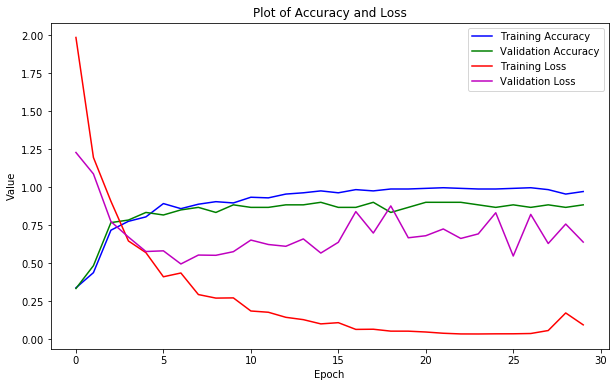

In [9]:
#Plot the loss curves
plt.figure(figsize=(10, 6))
plt.plot(history3.history['accuracy'], color='b')
plt.plot(history3.history['val_accuracy'], color='g')
plt.plot(history3.history['loss'], color='r')
plt.plot(history3.history['val_loss'], color='m')
plt.legend(['Training Accuracy', 'Validation Accuracy', 'Training Loss', 'Validation Loss'],
            loc='upper right')
plt.title('Plot of Accuracy and Loss')
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.show()
print(model.predict(test_dataset))

In [10]:
# 4th Training Model
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(32, (3, 3), 
		activation='relu', input_shape=(50, 50, 3)))
model.add(tf.keras.layers.Conv2D(64, (3, 3), 
		activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2), padding='same'))
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Flatten())	
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(4, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

trainingStartingTime4 = time.time()
history4 = model.fit(train_dataset, 
		batch_size=30, epochs=30, verbose=1,
		validation_data= test_dataset)
TrainingDuration4 = time.time() - trainingStartingTime4
print("Training Duration of CNN Model 4: {}" .format(float(TrainingDuration4)))

model.summary()

predictionStartingTime4 = time.time()
score = model.evaluate(test_dataset)
print("score =", score)
ValidationLoss4 = score[0]
ValidationAccuracyScore4 = score[1]
ValidationDuration4 = time.time() - predictionStartingTime4
print("Validation Duration of CNN Model 4 is: {}" .format(float(ValidationDuration4)))
print("Validation Accuracy of CNN Model 4 is {}" .format(float(ValidationAccuracyScore4)))
print("Validation Loss of CNN Model 4 is {}" .format(float(ValidationLoss4)))

Epoch 1/30
8/8 [==============================] - 3s 363ms/step - loss: 1.6560 - accuracy: 0.3833 - val_loss: 0.8711 - val_accuracy: 0.7500
Epoch 2/30
8/8 [==============================] - 2s 306ms/step - loss: 0.8131 - accuracy: 0.7292 - val_loss: 0.6981 - val_accuracy: 0.8333
Epoch 3/30
8/8 [==============================] - 2s 312ms/step - loss: 0.5353 - accuracy: 0.8208 - val_loss: 0.6195 - val_accuracy: 0.8500
Epoch 4/30
8/8 [==============================] - 2s 309ms/step - loss: 0.3788 - accuracy: 0.8625 - val_loss: 0.5439 - val_accuracy: 0.8667
Epoch 5/30
8/8 [==============================] - 2s 324ms/step - loss: 0.2602 - accuracy: 0.9167 - val_loss: 0.5741 - val_accuracy: 0.8667
Epoch 6/30
8/8 [==============================] - 2s 329ms/step - loss: 0.2504 - accuracy: 0.9042 - val_loss: 0.5423 - val_accuracy: 0.8833
Epoch 7/30
8/8 [==============================] - 2s 313ms/step - loss: 0.2135 - accuracy: 0.9458 - val_loss: 0.6366 - val_accuracy: 0.8500
Epoch 8/30
8/8 [====

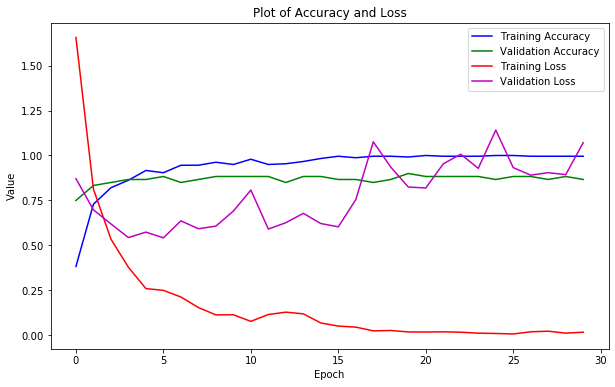

In [11]:
#Plot the loss curves
plt.figure(figsize=(10, 6))
plt.plot(history4.history['accuracy'], color='b')
plt.plot(history4.history['val_accuracy'], color='g')
plt.plot(history4.history['loss'], color='r')
plt.plot(history4.history['val_loss'], color='m')
plt.legend(['Training Accuracy', 'Validation Accuracy', 'Training Loss', 'Validation Loss'],
            loc='upper right')
plt.title('Plot of Accuracy and Loss')
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.show()
print(model.predict(test_dataset))

In [12]:
# 5th Training Model
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(32, (3, 3), 
		activation='relu', input_shape=(50, 50, 3)))
model.add(tf.keras.layers.Conv2D(32, (3, 3), 
		activation='relu'))
model.add(tf.keras.layers.Conv2D(32, (3, 3), 
		activation='relu'))
model.add(tf.keras.layers.Conv2D(32, (3, 3), 
		activation='relu'))
model.add(tf.keras.layers.Conv2D(32, (3, 3), 
		activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2), padding='same'))
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Flatten())	
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(4, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

trainingStartingTime5 = time.time()
history5 = model.fit(train_dataset, 
		batch_size=30, epochs=30, verbose=1,
		validation_data= test_dataset)
TrainingDuration5 = time.time() - trainingStartingTime5
print("Training Duration of CNN Model 5: {}" .format(float(TrainingDuration5)))

model.summary()

predictionStartingTime5 = time.time()
score = model.evaluate(test_dataset)
print("score =", score)
ValidationLoss5 = score[0]
ValidationAccuracyScore5 = score[1]
ValidationDuration5 = time.time() - predictionStartingTime5
print("Validation Duration of CNN Model 5 is: {}" .format(float(ValidationDuration5)))
print("Validation Accuracy of CNN Model 5 is {}" .format(float(ValidationAccuracyScore5)))
print("Validation Loss of CNN Model 5 is {}" .format(float(ValidationLoss5)))

Epoch 1/30
8/8 [==============================] - 4s 361ms/step - loss: 1.3568 - accuracy: 0.3458 - val_loss: 1.2782 - val_accuracy: 0.5667
Epoch 2/30
8/8 [==============================] - 2s 311ms/step - loss: 1.0713 - accuracy: 0.5708 - val_loss: 0.7464 - val_accuracy: 0.7833
Epoch 3/30
8/8 [==============================] - 2s 319ms/step - loss: 0.7453 - accuracy: 0.7083 - val_loss: 0.9088 - val_accuracy: 0.6000
Epoch 4/30
8/8 [==============================] - 2s 319ms/step - loss: 0.6764 - accuracy: 0.7583 - val_loss: 0.5804 - val_accuracy: 0.8167
Epoch 5/30
8/8 [==============================] - 2s 309ms/step - loss: 0.5575 - accuracy: 0.8250 - val_loss: 0.7452 - val_accuracy: 0.8000
Epoch 6/30
8/8 [==============================] - 2s 322ms/step - loss: 0.4440 - accuracy: 0.8542 - val_loss: 0.5946 - val_accuracy: 0.8000
Epoch 7/30
8/8 [==============================] - 2s 282ms/step - loss: 0.4274 - accuracy: 0.8458 - val_loss: 0.4990 - val_accuracy: 0.8667
Epoch 8/30
8/8 [====

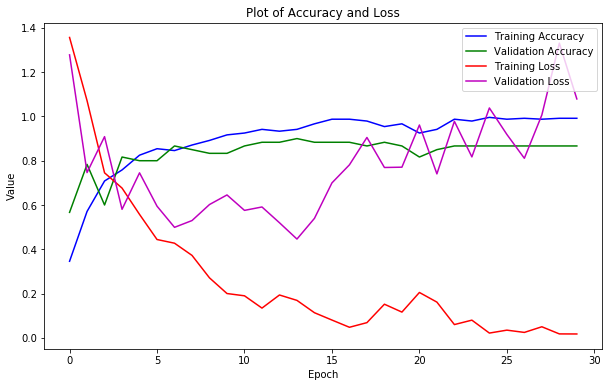

In [13]:
#Plot the loss curves
plt.figure(figsize=(10, 6))
plt.plot(history5.history['accuracy'], color='b')
plt.plot(history5.history['val_accuracy'], color='g')
plt.plot(history5.history['loss'], color='r')
plt.plot(history5.history['val_loss'], color='m')
plt.legend(['Training Accuracy', 'Validation Accuracy', 'Training Loss', 'Validation Loss'],
            loc='upper right')
plt.title('Plot of Accuracy and Loss')
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.show()
print(model.predict(test_dataset))

In [14]:
# 6th Training Model
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(32, (3, 3), 
		activation='relu', input_shape=(50, 50, 3)))
model.add(tf.keras.layers.Conv2D(32, (3, 3), 
		activation='relu'))
model.add(tf.keras.layers.Conv2D(64, (3, 3), 
		activation='relu'))
model.add(tf.keras.layers.Conv2D(64, (3, 3), 
		activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2), padding='same'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Flatten())	
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(4, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

trainingStartingTime6 = time.time()
history6 = model.fit(train_dataset, 
		batch_size=30, epochs=20, verbose=1,
		validation_data= test_dataset)
TrainingDuration6 = time.time() - trainingStartingTime6
print("Training Duration of CNN Model 6: {}" .format(float(TrainingDuration6)))

model.summary()

predictionStartingTime6 = time.time()
score = model.evaluate(test_dataset)
print("score =", score)
ValidationLoss6 = score[0]
ValidationAccuracyScore6 = score[1]
ValidationDuration6 = time.time() - predictionStartingTime6
print("Validation Duration of CNN Model 6 is: {}" .format(float(ValidationDuration6)))
print("Validation Accuracy of CNN Model 6 is {}" .format(float(ValidationAccuracyScore6)))
print("Validation Loss of CNN Model 6 is {}" .format(float(ValidationLoss6)))

Epoch 1/20
8/8 [==============================] - 3s 338ms/step - loss: 1.4469 - accuracy: 0.3542 - val_loss: 1.0898 - val_accuracy: 0.6167
Epoch 2/20
8/8 [==============================] - 2s 309ms/step - loss: 0.8997 - accuracy: 0.6542 - val_loss: 1.0902 - val_accuracy: 0.6000
Epoch 3/20
8/8 [==============================] - 2s 316ms/step - loss: 0.7477 - accuracy: 0.7375 - val_loss: 0.6868 - val_accuracy: 0.7667
Epoch 4/20
8/8 [==============================] - 2s 318ms/step - loss: 0.5650 - accuracy: 0.7833 - val_loss: 0.6359 - val_accuracy: 0.9000
Epoch 5/20
8/8 [==============================] - 2s 288ms/step - loss: 0.4552 - accuracy: 0.8125 - val_loss: 0.7175 - val_accuracy: 0.8000
Epoch 6/20
8/8 [==============================] - 2s 319ms/step - loss: 0.4209 - accuracy: 0.8417 - val_loss: 0.4713 - val_accuracy: 0.8333
Epoch 7/20
8/8 [==============================] - 2s 322ms/step - loss: 0.3040 - accuracy: 0.8917 - val_loss: 0.5287 - val_accuracy: 0.8500
Epoch 8/20
8/8 [====

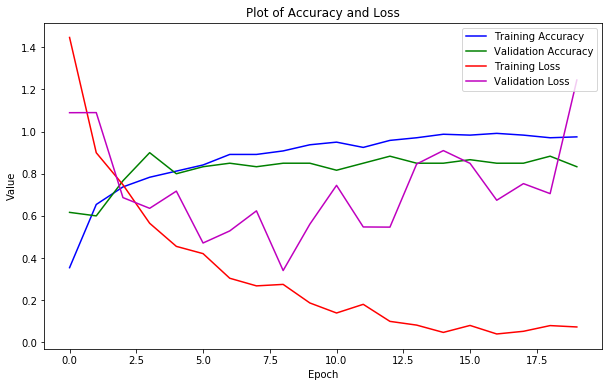

In [15]:
#Plot the loss curves
plt.figure(figsize=(10, 6))
plt.plot(history6.history['accuracy'], color='b')
plt.plot(history6.history['val_accuracy'], color='g')
plt.plot(history6.history['loss'], color='r')
plt.plot(history6.history['val_loss'], color='m')
plt.legend(['Training Accuracy', 'Validation Accuracy', 'Training Loss', 'Validation Loss'],
            loc='upper right')
plt.title('Plot of Accuracy and Loss')
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.show()
print(model.predict(test_dataset))

In [39]:
# 7th Training Model
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(32, (3, 3), 
		activation='relu', input_shape=(50, 50, 3)))
model.add(tf.keras.layers.Conv2D(32, (3, 3), 
		activation='relu'))
model.add(tf.keras.layers.Conv2D(64, (3, 3), 
		activation='relu'))
model.add(tf.keras.layers.Conv2D(64, (3, 3), 
		activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2), padding='same'))
model.add(tf.keras.layers.Dropout(0.6))
model.add(tf.keras.layers.Flatten())	
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.6))
model.add(tf.keras.layers.Dense(4, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

trainingStartingTime7 = time.time()
history7 = model.fit(train_dataset, 
		batch_size=30, epochs=20, verbose=1,
		validation_data= test_dataset)
TrainingDuration7 = time.time() - trainingStartingTime7
print("Training Duration of CNN Model 7: {}" .format(float(TrainingDuration7)))

model.summary()

predictionStartingTime7 = time.time()
score = model.evaluate(test_dataset)
print("score =", score)
ValidationLoss7 = score[0]
ValidationAccuracyScore7 = score[1]
ValidationDuration7 = time.time() - predictionStartingTime7
print("Validation Duration of CNN Model 7 is: {}" .format(float(ValidationDuration7)))
print("Validation Accuracy of CNN Model 7 is {}" .format(float(ValidationAccuracyScore7)))
print("Validation Loss of CNN Model 7 is {}" .format(float(ValidationLoss7)))

Epoch 1/20
8/8 [==============================] - 3s 379ms/step - loss: 1.3497 - accuracy: 0.3708 - val_loss: 1.2308 - val_accuracy: 0.5500
Epoch 2/20
8/8 [==============================] - 3s 309ms/step - loss: 1.1586 - accuracy: 0.5750 - val_loss: 0.9315 - val_accuracy: 0.5667
Epoch 3/20
8/8 [==============================] - 2s 322ms/step - loss: 0.8157 - accuracy: 0.7042 - val_loss: 0.6659 - val_accuracy: 0.7833
Epoch 4/20
8/8 [==============================] - 2s 320ms/step - loss: 0.5688 - accuracy: 0.7875 - val_loss: 0.6114 - val_accuracy: 0.7833
Epoch 5/20
8/8 [==============================] - 2s 310ms/step - loss: 0.4483 - accuracy: 0.8208 - val_loss: 0.7180 - val_accuracy: 0.8500
Epoch 6/20
8/8 [==============================] - 2s 284ms/step - loss: 0.4179 - accuracy: 0.8708 - val_loss: 0.7121 - val_accuracy: 0.8333
Epoch 7/20
8/8 [==============================] - 2s 308ms/step - loss: 0.3188 - accuracy: 0.9000 - val_loss: 0.4427 - val_accuracy: 0.8667
Epoch 8/20
8/8 [====

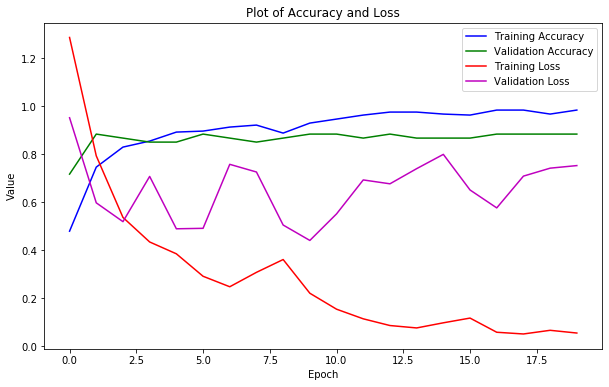

In [17]:
#Plot the loss curves
plt.figure(figsize=(10, 6))
plt.plot(history7.history['accuracy'], color='b')
plt.plot(history7.history['val_accuracy'], color='g')
plt.plot(history7.history['loss'], color='r')
plt.plot(history7.history['val_loss'], color='m')
plt.legend(['Training Accuracy', 'Validation Accuracy', 'Training Loss', 'Validation Loss'],
            loc='upper right')
plt.title('Plot of Accuracy and Loss')
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.show()
print(model.predict(test_dataset))

In [29]:
# 8th Training Model
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(32, (3, 3), 
		activation='relu', input_shape=(50, 50, 3)))
model.add(tf.keras.layers.Conv2D(32, (3, 3), 
		activation='relu'))
model.add(tf.keras.layers.Conv2D(64, (3, 3), 
		activation='relu'))
model.add(tf.keras.layers.Conv2D(64, (3, 3), 
		activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2), padding='same'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Flatten())	
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(4, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

trainingStartingTime8 = time.time()
history8 = model.fit(train_dataset, 
		batch_size=30, epochs=30, verbose=1,
		validation_data= test_dataset)
TrainingDuration8 = time.time() - trainingStartingTime8
print("Training Duration of CNN Model 8: {}" .format(float(TrainingDuration8)))

model.summary()

predictionStartingTime8 = time.time()
score = model.evaluate(test_dataset)
print("score =", score)
ValidationLoss8 = score[0]
ValidationAccuracyScore8 = score[1]
ValidationDuration8 = time.time() - predictionStartingTime8
print("Validation Duration of CNN Model 8 is: {}" .format(float(ValidationDuration8)))
print("Validation Accuracy of CNN Model 8 is {}" .format(float(ValidationAccuracyScore8)))
print("Validation Loss of CNN Model 8 is {}" .format(float(ValidationLoss8)))

Epoch 1/30
8/8 [==============================] - 3s 366ms/step - loss: 1.3837 - accuracy: 0.3625 - val_loss: 1.2446 - val_accuracy: 0.5833
Epoch 2/30
8/8 [==============================] - 2s 312ms/step - loss: 1.1121 - accuracy: 0.5625 - val_loss: 0.7985 - val_accuracy: 0.7833
Epoch 3/30
8/8 [==============================] - 2s 297ms/step - loss: 0.7522 - accuracy: 0.7167 - val_loss: 0.9957 - val_accuracy: 0.7000
Epoch 4/30
8/8 [==============================] - 2s 296ms/step - loss: 0.6603 - accuracy: 0.7625 - val_loss: 0.6444 - val_accuracy: 0.8333
Epoch 5/30
8/8 [==============================] - 2s 307ms/step - loss: 0.4255 - accuracy: 0.8333 - val_loss: 0.5054 - val_accuracy: 0.8667
Epoch 6/30
8/8 [==============================] - 2s 311ms/step - loss: 0.3866 - accuracy: 0.8667 - val_loss: 0.4869 - val_accuracy: 0.8667
Epoch 7/30
8/8 [==============================] - 2s 316ms/step - loss: 0.3082 - accuracy: 0.8917 - val_loss: 0.7551 - val_accuracy: 0.8167
Epoch 8/30
8/8 [====

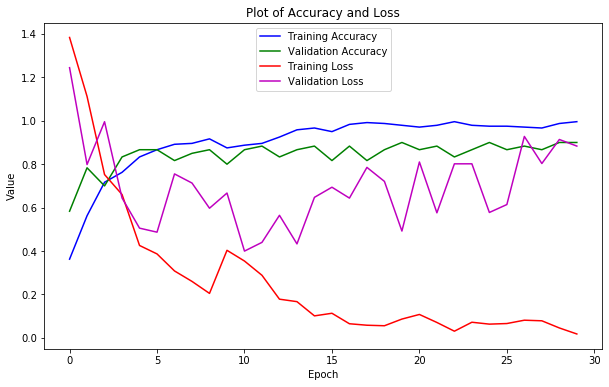

[[6.06946799e-07 1.73690057e-06 1.49862331e-04 9.99847770e-01]
 [8.35231333e-08 9.99432981e-01 4.57430840e-04 1.09466200e-04]
 [1.48825974e-08 9.63396261e-08 3.62463761e-05 9.99963641e-01]
 [9.99888062e-01 1.06184256e-04 3.29202544e-06 2.38728717e-06]
 [8.68012896e-04 9.93233263e-01 4.90713632e-03 9.91576468e-04]
 [9.99999881e-01 7.33287990e-08 1.48172741e-09 1.52639656e-09]
 [9.99791801e-01 2.04794807e-04 2.89198601e-06 5.31074932e-07]
 [2.96851539e-08 4.32366551e-06 1.06121472e-03 9.98934329e-01]
 [9.99921322e-01 6.24722816e-05 2.08010511e-06 1.40931834e-05]
 [1.01673461e-01 7.45560884e-01 9.35883671e-02 5.91772944e-02]
 [2.60646897e-03 9.32644546e-01 6.17388487e-02 3.01004061e-03]
 [1.00188612e-04 1.39785057e-03 4.44934890e-03 9.94052589e-01]
 [1.07067532e-03 9.59755003e-01 3.47610749e-02 4.41331277e-03]
 [3.50231894e-05 2.75392027e-04 6.43741526e-03 9.93252099e-01]
 [1.65599013e-05 1.40877685e-03 6.09792722e-03 9.92476761e-01]
 [1.76612241e-06 1.42871386e-05 6.07092492e-03 9.939131

In [39]:
#Plot the loss curves
plt.figure(figsize=(10, 6))
plt.plot(history8.history['accuracy'], color='b')
plt.plot(history8.history['val_accuracy'], color='g')
plt.plot(history8.history['loss'], color='r')
plt.plot(history8.history['val_loss'], color='m')
plt.legend(['Training Accuracy', 'Validation Accuracy', 'Training Loss', 'Validation Loss'],
            loc='upper center')
plt.title('Plot of Accuracy and Loss')
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.show()
print(model.predict(test_dataset))

In [27]:
# 9th Training Model
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(32, (3, 3), 
		activation='relu', input_shape=(50, 50, 3)))
model.add(tf.keras.layers.Conv2D(32, (3, 3), 
		activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2), padding='valid'))
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Flatten())	
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(4, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

trainingStartingTime9 = time.time()
history9 = model.fit(train_dataset, 
		batch_size=30, epochs=30, verbose=1,
		validation_data= test_dataset)
TrainingDuration9 = time.time() - trainingStartingTime9
print("Training Duration of CNN Model 9: {}" .format(float(TrainingDuration9)))

model.summary()

predictionStartingTime9 = time.time()
score = model.evaluate(test_dataset)
print("score =", score)
ValidationLoss9 = score[0]
ValidationAccuracyScore9 = score[1]
ValidationDuration9 = time.time() - predictionStartingTime9
print("Validation Duration of CNN Model 9 is: {}" .format(float(ValidationDuration9)))
print("Validation Accuracy of CNN Model 9 is {}" .format(float(ValidationAccuracyScore9)))
print("Validation Loss of CNN Model 9 is {}" .format(float(ValidationLoss9)))

Epoch 1/30
8/8 [==============================] - 3s 354ms/step - loss: 1.6891 - accuracy: 0.3167 - val_loss: 1.1921 - val_accuracy: 0.5500
Epoch 2/30
8/8 [==============================] - 2s 312ms/step - loss: 1.0786 - accuracy: 0.5917 - val_loss: 0.9162 - val_accuracy: 0.6833
Epoch 3/30
8/8 [==============================] - 2s 293ms/step - loss: 0.7978 - accuracy: 0.7250 - val_loss: 0.7337 - val_accuracy: 0.7833
Epoch 4/30
8/8 [==============================] - 2s 323ms/step - loss: 0.5548 - accuracy: 0.7875 - val_loss: 0.7202 - val_accuracy: 0.7833
Epoch 5/30
8/8 [==============================] - 2s 305ms/step - loss: 0.4778 - accuracy: 0.8458 - val_loss: 0.8040 - val_accuracy: 0.8167
Epoch 6/30
8/8 [==============================] - 2s 312ms/step - loss: 0.3965 - accuracy: 0.8667 - val_loss: 0.6182 - val_accuracy: 0.8167
Epoch 7/30
8/8 [==============================] - 2s 305ms/step - loss: 0.3186 - accuracy: 0.8917 - val_loss: 0.5900 - val_accuracy: 0.8500
Epoch 8/30
8/8 [====

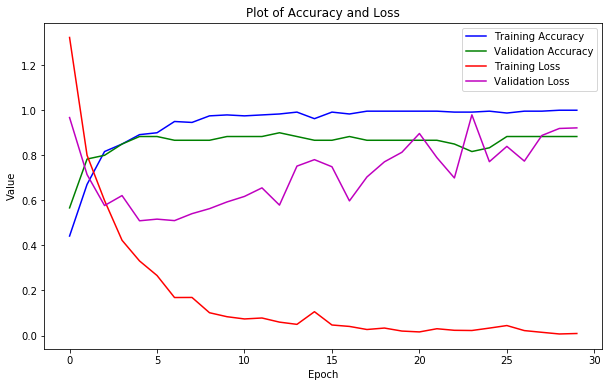

In [21]:
#Plot the loss curves
plt.figure(figsize=(10, 6))
plt.plot(history9.history['accuracy'], color='b')
plt.plot(history9.history['val_accuracy'], color='g')
plt.plot(history9.history['loss'], color='r')
plt.plot(history9.history['val_loss'], color='m')
plt.legend(['Training Accuracy', 'Validation Accuracy', 'Training Loss', 'Validation Loss'],
            loc='upper center')
plt.title('Plot of Accuracy and Loss')
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.show()
print(model.predict(test_dataset))

In [47]:
# 10th Training Model
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(32, (3, 3), 
		activation='relu', input_shape=(50, 50, 3)))
model.add(tf.keras.layers.Conv2D(32, (3, 3), 
		activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2), padding='valid'))
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Flatten())	
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(4, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

trainingStartingTime10 = time.time()
history10 = model.fit(train_dataset, 
		batch_size=30, epochs=40, verbose=1,
		validation_data= test_dataset)
TrainingDuration10 = time.time() - trainingStartingTime10
print("Training Duration of CNN Model 10: {}" .format(float(TrainingDuration10)))

model.summary()

predictionStartingTime10 = time.time()
score = model.evaluate(test_dataset)
print("score =", score)
ValidationLoss10 = score[0]
ValidationAccuracyScore10 = score[1]
ValidationDuration10 = time.time() - predictionStartingTime10
print("Validation Duration of CNN Model 10 is: {}" .format(float(ValidationDuration10)))
print("Validation Accuracy of CNN Model 10 is {}" .format(float(ValidationAccuracyScore10)))
print("Validation Loss of CNN Model 10 is {}" .format(float(ValidationLoss10)))

Epoch 1/40
8/8 [==============================] - 3s 387ms/step - loss: 1.8301 - accuracy: 0.3500 - val_loss: 1.3053 - val_accuracy: 0.4000
Epoch 2/40
8/8 [==============================] - 2s 320ms/step - loss: 1.2133 - accuracy: 0.5167 - val_loss: 1.0891 - val_accuracy: 0.5500
Epoch 3/40
8/8 [==============================] - 2s 312ms/step - loss: 0.9144 - accuracy: 0.7042 - val_loss: 0.8251 - val_accuracy: 0.7000
Epoch 4/40
8/8 [==============================] - 2s 319ms/step - loss: 0.6693 - accuracy: 0.7833 - val_loss: 0.6711 - val_accuracy: 0.8167
Epoch 5/40
8/8 [==============================] - 2s 314ms/step - loss: 0.5311 - accuracy: 0.8083 - val_loss: 0.6386 - val_accuracy: 0.8167
Epoch 6/40
8/8 [==============================] - 2s 331ms/step - loss: 0.4138 - accuracy: 0.8417 - val_loss: 0.6690 - val_accuracy: 0.8333
Epoch 7/40
8/8 [==============================] - 2s 305ms/step - loss: 0.3570 - accuracy: 0.8667 - val_loss: 0.6886 - val_accuracy: 0.8000
Epoch 8/40
8/8 [====

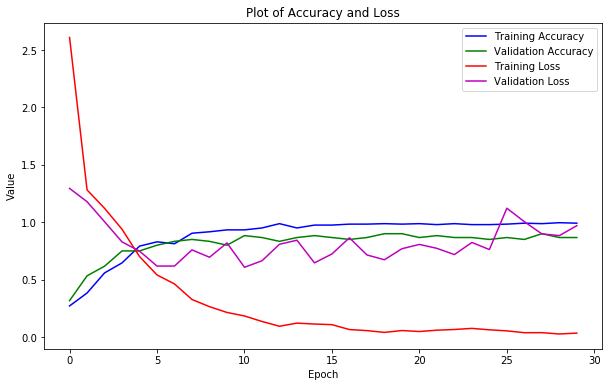

In [24]:
#Plot the loss curves
plt.figure(figsize=(10, 6))
plt.plot(history10.history['accuracy'], color='b')
plt.plot(history10.history['val_accuracy'], color='g')
plt.plot(history10.history['loss'], color='r')
plt.plot(history10.history['val_loss'], color='m')
plt.legend(['Training Accuracy', 'Validation Accuracy', 'Training Loss', 'Validation Loss'],
            loc='upper right')
plt.title('Plot of Accuracy and Loss')
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.show()
print(model.predict(test_dataset))

In [38]:
# 11th Training Model
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(32, (3, 3), 
		activation='relu', input_shape=(50, 50, 3)))
model.add(tf.keras.layers.Conv2D(32, (3, 3), 
		activation='relu'))
model.add(tf.keras.layers.Conv2D(64, (3, 3), 
		activation='relu'))
model.add(tf.keras.layers.Conv2D(64, (3, 3), 
		activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2), padding='same'))
model.add(tf.keras.layers.Dropout(0.8))
model.add(tf.keras.layers.Flatten())	
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.8))
model.add(tf.keras.layers.Dense(4, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

trainingStartingTime11 = time.time()
history11 = model.fit(train_dataset, 
		batch_size=30, epochs=30, verbose=1,
		validation_data= test_dataset)
TrainingDuration11 = time.time() - trainingStartingTime11
print("Training Duration of CNN Model 11: {}" .format(float(TrainingDuration11)))

model.summary()

predictionStartingTime11 = time.time()
score = model.evaluate(test_dataset)
print("score =", score)
ValidationLoss11 = score[0]
ValidationAccuracyScore11 = score[1]
ValidationDuration11 = time.time() - predictionStartingTime11
print("Validation Duration of CNN Model 11 is: {}" .format(float(ValidationDuration11)))
print("Validation Accuracy of CNN Model 11 is {}" .format(float(ValidationAccuracyScore11)))
print("Validation Loss of CNN Model 11 is {}" .format(float(ValidationLoss11)))

Epoch 1/30
8/8 [==============================] - 3s 366ms/step - loss: 1.4238 - accuracy: 0.3292 - val_loss: 1.3108 - val_accuracy: 0.4500
Epoch 2/30
8/8 [==============================] - 2s 289ms/step - loss: 1.2865 - accuracy: 0.4542 - val_loss: 1.1447 - val_accuracy: 0.6333
Epoch 3/30
8/8 [==============================] - 2s 308ms/step - loss: 1.1260 - accuracy: 0.5542 - val_loss: 0.9413 - val_accuracy: 0.7500
Epoch 4/30
8/8 [==============================] - 2s 313ms/step - loss: 0.9238 - accuracy: 0.6000 - val_loss: 1.0265 - val_accuracy: 0.6000
Epoch 5/30
8/8 [==============================] - 2s 309ms/step - loss: 0.8730 - accuracy: 0.7083 - val_loss: 0.8118 - val_accuracy: 0.8000
Epoch 6/30
8/8 [==============================] - 2s 297ms/step - loss: 0.7963 - accuracy: 0.7458 - val_loss: 0.6998 - val_accuracy: 0.7333
Epoch 7/30
8/8 [==============================] - 2s 308ms/step - loss: 0.7288 - accuracy: 0.7833 - val_loss: 0.6834 - val_accuracy: 0.8167
Epoch 8/30
8/8 [====

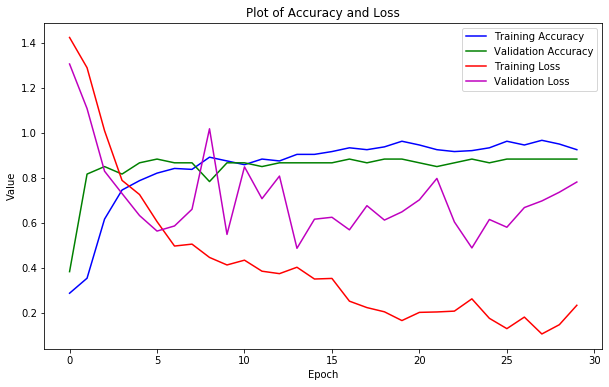

[[1.78715363e-02 1.64168974e-04 2.85484679e-02 9.53415811e-01]
 [6.50267182e-08 2.18250784e-06 4.81354864e-03 9.95184243e-01]
 [1.00000000e+00 1.68289091e-12 3.96078448e-11 1.95684474e-15]
 [9.99922037e-01 1.51921586e-05 4.37120207e-07 6.24224194e-05]
 [9.99997735e-01 1.48008121e-06 7.97732241e-07 4.87175578e-10]
 [3.77833430e-06 9.99771774e-01 2.18556874e-04 5.84201143e-06]
 [1.60381624e-05 7.42371340e-05 6.56299433e-03 9.93346810e-01]
 [1.62983438e-09 6.25348449e-08 2.30175303e-03 9.97698128e-01]
 [2.16444978e-03 9.94249821e-01 3.08092637e-03 5.04796219e-04]
 [7.57338938e-08 9.99427855e-01 4.99119924e-04 7.28341474e-05]
 [9.47065473e-01 5.00441082e-02 2.75102304e-03 1.39393582e-04]
 [6.75000809e-03 9.77230370e-01 1.52858337e-02 7.33813387e-04]
 [7.24993242e-07 9.96903002e-01 2.98009487e-03 1.16158830e-04]
 [1.28649885e-03 4.38370518e-02 1.27265677e-01 8.27610850e-01]
 [3.93869169e-03 1.44656477e-02 3.45713608e-02 9.47024345e-01]
 [9.99999881e-01 6.50134080e-09 6.74223557e-08 3.161381

In [8]:
#Plot the loss curves
plt.figure(figsize=(10, 6))
plt.plot(history11.history['accuracy'], color='b')
plt.plot(history11.history['val_accuracy'], color='g')
plt.plot(history11.history['loss'], color='r')
plt.plot(history11.history['val_loss'], color='m')
plt.legend(['Training Accuracy', 'Validation Accuracy', 'Training Loss', 'Validation Loss'],
            loc='upper right')
plt.title('Plot of Accuracy and Loss')
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.show()
print(model.predict(test_dataset))